In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
housing_path = '/content/drive/MyDrive/data/Housing.csv'

In [ ]:
# Nạp dữ liệu từ tập tin CSV (thay đổi đường dẫn tới tệp tin của bạn)
data = pd.read_csv(housing_path)

# Kiểm tra số dòng và số cột của dữ liệu
print("Số dòng:", len(data))
print("Số cột:", len(data.columns))

Số dòng: 545
Số cột: 13


In [ ]:
print('Đếm cho prefarea')
c1 = data['prefarea'].value_counts()
print(c1)
print('Tính phần trăm cho prefarea')
p1 = data['prefarea'].value_counts(normalize=True)
print(p1)

Đếm cho prefarea
no     417
yes    128
Name: prefarea, dtype: int64
Tính phần trăm cho prefarea
no     0.765138
yes    0.234862
Name: prefarea, dtype: float64


In [ ]:
print('Đếm cho area')
sub1 = data['area'] > 6500
# Đếm lại giá trị của Series sau khi tinh chỉnh
c2 = sub1.value_counts()
# In ra kết quả
print(c2)
percentage_above_6500 = (c2[True] / len(data)) * 100
percentage_above = (c2[False] / len(data)) * 100
print("Phần trăm giá trị diện tích > 6500 ft2:", percentage_above_6500)
print("Phần trăm giá trị diện tích <= 6500 ft2:", percentage_above)

Đếm cho area
False    422
True     123
Name: area, dtype: int64
Phần trăm giá trị diện tích > 6500 ft2: 22.568807339449542
Phần trăm giá trị diện tích <= 6500 ft2: 77.43119266055047


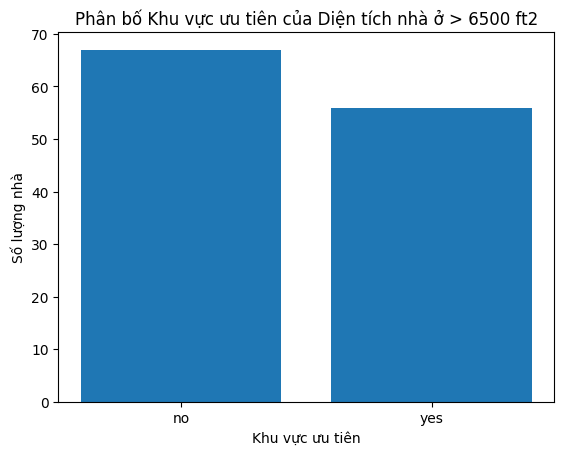

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Lọc các dòng có diện tích nhà ở lớn hơn 6500 ft2
filtered_data = data[data['area'] > 6500]

# Tính tần suất xuất hiện của các giá trị trong cột 'prefarea'
prefarea_counts = filtered_data['prefarea'].value_counts()

# Tạo biểu đồ bar plot (biểu đồ cột thẳng đứng)
plt.bar(prefarea_counts.index, prefarea_counts.values)

# Đặt tên cho trục x và y
plt.xlabel('Khu vực ưu tiên')
plt.ylabel('Số lượng nhà')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân bố Khu vực ưu tiên của Diện tích nhà ở > 6500 ft2')

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Lựa chọn những căn nhà có diện tích lớn hơn 6500 ft2 và có khu vực ưu tiên
sub2 = data[(data['area'] > 6500) & (data['prefarea'] == 'yes')]

# In ra kích thước của tập dữ liệu con
num_rows, num_columns = sub2.shape
print(f"Số dòng và số cột của tập dữ liệu con: {num_rows} dòng, {num_columns} cột")


Số dòng và số cột của tập dữ liệu con: 56 dòng, 13 cột


In [ ]:
import pandas as pd

# Tạo các nhóm dựa trên diện tích và khu vực ưu tiên
# Nhóm 1: Diện tích > 6500 ft2, Có khu vực ưu tiên
group1 = data[(data['area'] > 6500) & (data['prefarea'] == 'yes')]

# Nhóm 2: Diện tích > 6500 ft2, Không có khu vực ưu tiên
group2 = data[(data['area'] > 6500) & (data['prefarea'] == 'no')]

# Nhóm 3: Diện tích <= 6500 ft2, Có khu vực ưu tiên
group3 = data[(data['area'] <= 6500) & (data['prefarea'] == 'yes')]

# Nhóm 4: Diện tích <= 6500 ft2, Không có khu vực ưu tiên
group4 = data[(data['area'] <= 6500) & (data['prefarea'] == 'no')]

# Hiển thị kích thước của từng nhóm
print(f"Số dòng và số cột của Nhóm 1: {group1.shape}")
print(f"Số dòng và số cột của Nhóm 2: {group2.shape}")
print(f"Số dòng và số cột của Nhóm 3: {group3.shape}")
print(f"Số dòng và số cột của Nhóm 4: {group4.shape}")


Số dòng và số cột của Nhóm 1: (56, 13)
Số dòng và số cột của Nhóm 2: (67, 13)
Số dòng và số cột của Nhóm 3: (72, 13)
Số dòng và số cột của Nhóm 4: (350, 13)


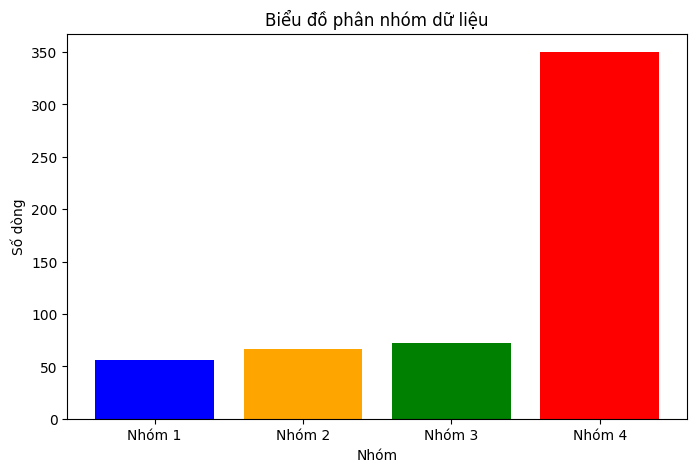

In [ ]:
# Tạo danh sách các nhóm và số dòng tương ứng
groups = ['Nhóm 1', 'Nhóm 2', 'Nhóm 3', 'Nhóm 4']
num_rows = [group1.shape[0], group2.shape[0], group3.shape[0], group4.shape[0]]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(groups, num_rows, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Nhóm')
plt.ylabel('Số dòng')
plt.title('Biểu đồ phân nhóm dữ liệu')
plt.show()